<a href="https://colab.research.google.com/github/stac-bot/Machine_learning_projects/blob/main/GRE_vocab_High_frequency_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Let's Learn GRE vocabulary the machine with Machine Learning</h1>

<h3>Access all the data from Barron,Magoosh,Manhattan</h3>

In [1]:
!unzip /content/gre-high-frequency-vocabulary-word-lists.zip

Archive:  /content/gre-high-frequency-vocabulary-word-lists.zip
  inflating: barron_333.csv          
  inflating: magoosh_1000.csv        
  inflating: manhattan_500.csv       
  inflating: words_meaning_embeddings.csv  
  inflating: words_sentences_5.csv   


<h3>Import important libraries</h3>

In [3]:
#!pip install wordcloud
!pip3 install wikipedia

In [4]:
#!pip install wikipedia 
import PIL #pillow module
import wikipedia

<h2>Funny exercise with wordcloud, Pillow, wikipedia</h2>
so that we can understand what the function of wordcloud is.


In [6]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS


stop_w = set(STOPWORDS)
info = wikipedia.summary("MachineLearning") # this will search the wikipedia and get the data
word_cloud = WordCloud(stopwords = stop_w).generate(info)
#img = word_cloud.to_image()
#img.show()
img  = word_cloud.to_image()
img = img.save("word.png")

In [22]:
img = Image.open(r"/content/word.png")

<h3>let's also take the look at the power of tqdm</h3>

In [15]:
from tqdm import trange, tqdm_notebook
from time import sleep
for i in tqdm_notebook(range(4), desc='1st loop'):
  for j in tqdm_notebook(range(100), desc= '2nd loop',leave = False):
    sleep(0.001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


1st loop:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

In [7]:
from scipy.cluster import hierarchy
from wordcloud import wordcloud
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import numpy as np
import plotly.express as px 
sns.set()

In [9]:
!unzip gre-high-frequency-vocabulary-word-lists.zip

Archive:  gre-high-frequency-vocabulary-word-lists.zip
  inflating: barron_333.csv          
  inflating: magoosh_1000.csv        
  inflating: manhattan_500.csv       
  inflating: words_meaning_embeddings.csv  
  inflating: words_sentences_5.csv   


In [20]:
#let import the 3 word lists and merge them to a single list
#only word and defination 
import pandas as pd
high_frquency_word_list = []
magoosh = pd.read_csv('/content/magoosh_1000.csv')[['word','definition']]
magoosh['word_list'] = ['magoosh_1000']*magoosh.shape[0]

manhattan = pd.read_csv('/content/manhattan_500.csv')[['word','definition']]
manhattan['word_list'] = ['manhattan_500']*manhattan.shape[0]

barron = pd.read_csv('/content/barron_333.csv')
barron['word_list'] = ['barron_333']*barron.shape[0]


df = pd.concat([barron, manhattan, magoosh]).dropna().drop_duplicates(subset=['word'])


In [21]:
df.shape

(326, 4)

In [19]:
df
magoosh.shape, manhattan.shape

((1066, 3), (494, 3))

In [18]:
df1 = pd.concat([magoosh, manhattan, barron]).drop_duplicates(subset ='word')
df1.dropna()
    


,word,definition,word_list,frequency
2,abeyance,temporary cessation or suspension,barron_333,4862.91
3,abscond,"run away, often taking something or somebody a...",barron_333,6435.03
4,abstemious,marked by temperance in indulgence,barron_333,7558.10
6,adulterate,make impure by adding a foreign or inferior su...,barron_333,2689.04
11,amalgamate,bring or combine together or with something else,barron_333,2430.46
...,...,...,...,...
313,transgression,the violation of a law or a duty or moral prin...,barron_333,1534.58
320,viscous,having a relatively high resistance to flow,barron_333,9665.20
321,vituperative,marked by harshly abusive criticism,barron_333,21335.50
324,welter,a confused multitude of things,barron_333,3648.94


In [23]:
#this function calculate aplbabetical frequency
def alphabet_frequecny(df, wordlist='all'):
  counts={}
  if wordlist== 'manhattan':
    df = df[df['word_list']=='manhattan_500']
  elif wordlist=='barrons':
    df = df[df['word_list']=='barrons_333']
  elif wordlist=='magoosh':
    df = df[df['word_list']=='magoosh_1000']

  for i in list('abcdefghijklmnopqrstuvwxyz'):
    k=1
    for j in df.word:
      if j[0]==i:
        k+=1
    counts[i] = k

  dd = pd.DataFrame()
  dd['alphabet'] = counts.keys()
  dd['frequency'] = counts.values()

  fig = px.bar(dd, x='alphabet', y ='frequency')
  fig.show()

In [24]:
alphabet_frequecny(df)

In [59]:
alphabet_frequecny(df1, wordlist='manhattan')

In [60]:
alphabet_frequecny(df1, wordlist='magoosh')

In [62]:
alphabet_frequecny(df1, wordlist='barron')

In [65]:
barron = pd.read_csv('barron_333.csv')
barron.head()

,word,definition,frequency
0,abate,become less in amount or intensity,655.45
1,aberrant,markedly different from an accepted norm,25639.42
2,abeyance,temporary cessation or suspension,4862.91
3,abscond,"run away, often taking something or somebody a...",6435.03
4,abstemious,marked by temperance in indulgence,7558.10


Box plot frequency distribution

In [66]:
fig = px.box(barron, y ='frequency')
fig.show()

Let's look at the highest and lowest frequnct GRE words

In [21]:
#collecting words with frequency over 10k
def top_frequency(barron, n=30):
  high_frequency = barron[['word','frequency']].sort_values(by='frequency',ascending=False)
  word_list = {}
  for w,f in high_frequency.values[:n]:
    word_list[w] = int(f)
  wordcloud = WordCloud(background_color = "black").generate_from_frequencies(word_list)
  plt.figure(figsize=(15,6))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()
  

Top 30 highest occuring words per barron's list

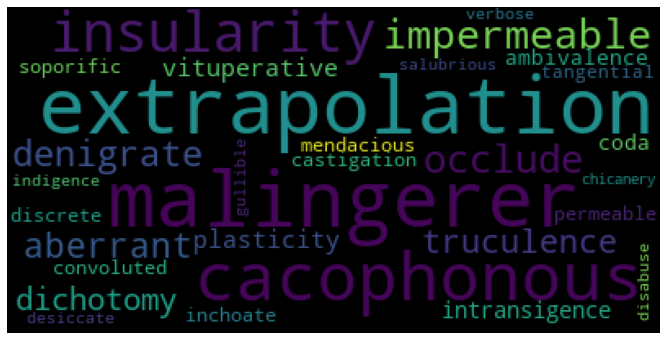

In [22]:
top_frequency(barron, n=30)

Lowest 30 as per barron's

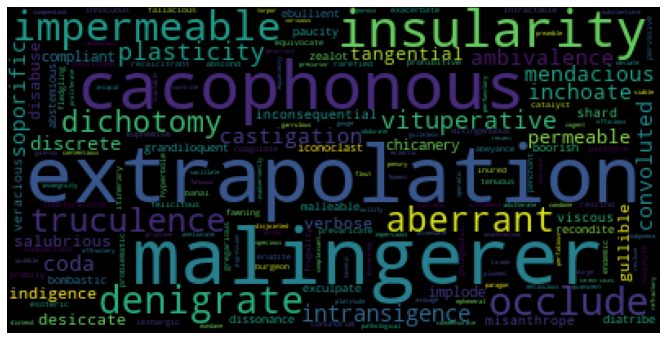

In [69]:
top_frequency(barron, n= -30)

words common in Magoosh and Barron lists

In [76]:
common_words_1 = set.intersection(set(magoosh['word']),set(barron['word']))
len(common_words_1)


154

In [77]:
# words common in Magoosh and Manhattan lists

common_words_2 = set.intersection(set(magoosh['word']), set(manhattan['word']))
len(common_words_2)


194

In [78]:
# words common in Manhattan and Barron lists

common_words_3 = set.intersection(set(manhattan['word']), set(barron['word']))
len(common_words_3)

174

In [79]:
# words common in Manhattan, Barron and Magoosh lists
common_words_all = set.intersection(set(manhattan['word']), set(barron['word']), set(magoosh['word']))
len(common_words_all)

92

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


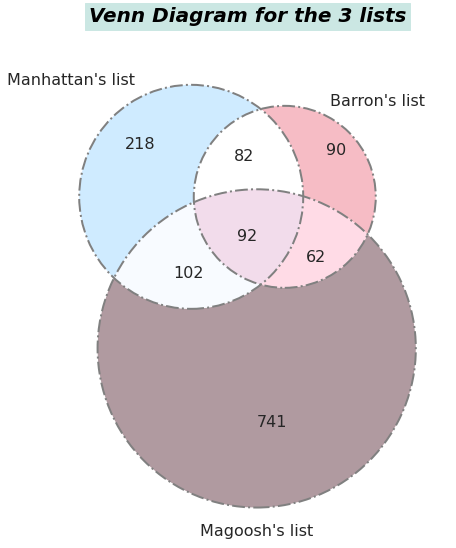

In [81]:
from matplotlib_venn import venn3, venn3_circles

plt.figure(figsize=(16,9))
vd3 = venn3([set(manhattan['word']),set(barron['word']), set(magoosh['word'])],
            set_labels = ('Manhattan\'s list', 'Barron\'s list', 'Magoosh\'s list'),
            set_colors=("#c4e6ff","#F4ACB7",'#9D8189'),
            alpha = 0.8)

venn3_circles([set(manhattan['word']), set(barron['word']), set(magoosh['word'])],
              linestyle='-.',linewidth = 2, color='grey')

for text in vd3.set_labels:
  text.set_fontsize(16);
for text in vd3.subset_labels:
  text.set_fontsize(16)

plt.title('Venn Diagram for the 3 lists', fontname='Times New Roman', fontweight='bold', fontsize=20,
          pad=30,backgroundcolor='#cbe7e3', color='black', style='italic')
plt.show()

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashutoshrudraksh","key":"072004edc07f119ca66322c9446cf175"}'}

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [3]:
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip


--2022-02-05 03:33:54--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2022-02-05 03:33:54--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2022-02-05 03:33:55--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [4]:
!unzip glove.840B.300d.zip

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [23]:


file = open('glove.840B.300d.txt')
dic = {}
for line in tqdm(file):
  w = line.split()[0]
  if w in df.word.values:
    m=line.split()[1:]
    dic[w]=m
file.close()

0it [00:00, ?it/s]

In [25]:
w2v = []
for w in df.word.values:
  if w in dic.keys():
    w2v.append(np.asarray(dic[w]).astype(np.float))
  else:
    w2v.append(np.nan)

In [5]:
print(w2v)

NameError: ignored

In [39]:
df['embedding'] = w2v
df = df.dropna() 
count=0
for i,e in enumerate(w2v):
    if count<300:
      c = f'embedding_{i+1}'
      df[c] = e
      count+=1

df.to_csv('words_meaning_embeddings.csv',index=False)

ValueError: ignored

<h2>I've already prepared and saved a dataframe containing the data. We can simply use that and skip the above steps.¶
</h2>

In [28]:
df = pd.read_csv('words_meaning_embeddings.csv')
df.head()

,word,definition,word_list,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,embedding_11,embedding_12,embedding_13,embedding_14,embedding_15,embedding_16,embedding_17,embedding_18,embedding_19,embedding_20,embedding_21,embedding_22,embedding_23,embedding_24,embedding_25,embedding_26,embedding_27,embedding_28,embedding_29,embedding_30,embedding_31,embedding_32,embedding_33,embedding_34,embedding_35,embedding_36,embedding_37,...,embedding_261,embedding_262,embedding_263,embedding_264,embedding_265,embedding_266,embedding_267,embedding_268,embedding_269,embedding_270,embedding_271,embedding_272,embedding_273,embedding_274,embedding_275,embedding_276,embedding_277,embedding_278,embedding_279,embedding_280,embedding_281,embedding_282,embedding_283,embedding_284,embedding_285,embedding_286,embedding_287,embedding_288,embedding_289,embedding_290,embedding_291,embedding_292,embedding_293,embedding_294,embedding_295,embedding_296,embedding_297,embedding_298,embedding_299,embedding_300
0,abate,"(v) reduce, diminish",manhattan_500,-0.167740,0.449010,-0.034792,-0.33467,-0.072335,-0.11709,-0.409030,0.547280,-0.57967,0.65583,0.30611,-0.324630,0.047227,0.10661,-0.10470,0.139330,0.31107,-0.13968,0.011151,0.57837,-0.17459,-0.267690,-0.180710,-0.167770,-0.48567,-0.179070,-0.500370,-0.093921,-0.476780,0.16791,0.004139,-0.18769,-0.621650,0.75235,-0.042865,-0.226550,0.031886,...,-0.55534,-0.003281,-0.001548,0.648720,0.198830,-0.33978,0.221520,-0.313650,-0.78382,-0.23766,0.77990,-0.394710,0.019861,0.002740,0.216180,-0.31212,-0.32094,0.50827,0.716030,0.258510,0.064193,-0.10996,0.432240,0.480900,-0.640950,-0.074377,0.575420,0.015654,-0.177200,-0.213210,0.010327,0.53484,0.24874,0.027785,0.013996,-0.609270,0.118440,-0.432880,-0.38250,-0.392370
1,abdicate,(v) formally give up the throne (or some other...,manhattan_500,0.597720,-0.068959,0.697380,0.65739,-0.737210,0.20969,-0.097418,0.075696,-0.12728,0.63213,0.37130,0.485350,0.224740,0.41903,0.12196,-0.023012,-0.13237,-1.36540,0.596400,0.86680,0.45890,-0.302150,-0.393200,0.089110,-0.37520,-0.012972,-0.209650,-0.270680,0.433820,0.66477,-0.454470,0.12924,0.255170,0.17916,0.376580,-0.120590,0.330100,...,-0.44979,0.304370,-0.216160,0.703500,-0.046047,-0.38881,-0.057878,-0.429060,-0.91085,0.11941,0.40508,-0.521680,0.360890,-0.000607,-0.076022,-0.11145,0.49981,0.37218,0.199940,-0.495000,-0.006026,0.64795,0.085187,0.297040,0.048195,0.340820,0.221900,0.515370,-0.151970,0.446730,0.371800,0.18145,-0.34537,-0.412340,-0.079992,-0.077132,0.158570,0.212230,0.22574,-0.508390
2,aberrant,"(adj) abnormal, deviant",manhattan_500,-0.157290,-0.107370,-0.424600,0.24734,-0.130630,0.28971,-0.168990,0.817100,-0.15737,0.11981,0.72876,-0.018386,0.342850,0.28952,0.54783,0.092198,-0.28085,0.22291,0.304330,0.17301,0.15691,-0.011815,-0.085792,0.019265,-0.16713,0.381460,0.012467,0.241800,0.621230,0.55484,0.186940,0.23953,-0.061978,0.47266,-0.101090,0.551140,-0.268070,...,-0.54234,0.266940,0.312340,0.067919,0.225920,0.52397,0.573590,-0.172720,0.83685,0.39215,-0.18221,0.005809,0.230680,-0.469270,-0.607930,0.15837,-0.52245,-0.33792,-0.108960,0.420950,0.412450,0.10463,0.329890,0.052734,-0.136300,0.639750,0.459560,-0.016943,0.371850,-0.044698,0.228900,0.20149,-0.36204,-0.188490,-0.008103,0.588790,-0.661020,0.033079,-0.05157,-0.443970
3,abhor,"(v) detest, regard with disgust",manhattan_500,0.037965,0.074088,0.187610,-0.11341,0.167890,0.20819,-0.256270,0.274380,-0.25540,0.51722,0.40451,-0.041979,-0.244460,-0.11105,-0.15014,0.088242,-0.47631,-1.00220,-0.298900,1.18450,0.37216,-0.113690,-0.174670,0.404450,-0.26819,0.198880,-0.152810,-0.041717,0.012838,0.23915,-0.181830,0.32302,-0.596250,0.17262,0.191690,-0.018750,0.148490,...,0.22450,0.233060,-0.188400,0.256070,-0.071319,0.42486,0.209090,0.136650,0.11819,0.61335,-0.19132,-0.905230,-0.036820,0.247450,0.422030,0.28146,-0.10399,0.46904,0.083433,-0.024695,0.430560,-0.15240,0.321470,-0.012846,-0.061653,0.214840,0.149270,-0.344200

In [29]:
w2v = df[df.columns[3:]]
w2v.shape

(1379, 300)

##Now it's time to cluster the word-embeddings using Hierarchical Clustering.¶


<h2>Algorithm</h2>

1. Preparing the data
2. Computing (dis)similarity information between every pair of objects in the data set.
3. Using linkage function to group objects into hierarchical cluster tree, based on the distance information generated at step 1. Objects/clusters that are in close proximity are linked together using the linkage function.
4. Determining where to cut the hierarchical tree into clusters. This creates a partition of the data.


Hierarchical Clustering is a type of unsupevised learning technique that uses groups similar objects into groups called clusters.

Note: agglomerative clustering is good at identifying small clusters. Divisive clustering is good at identifying large clusters. In this article, we’ll focus mainly on agglomerative hierarchical clustering.

In [31]:
threshold = 0.7
Z = hierarchy.linkage(w2v, "average", metric="cosine",)
C = hierarchy.fcluster(Z, threshold, criterion="distance")

n = len(np.unique(C))
print(f'Number of cluster created: {n}')


Number of cluster created: 149


In [32]:
#embedding the cluster to dataframe for extracting word cluster
data = df[['word','definition']].copy() 
data['labels'] = C

In [33]:
data

,word,definition,labels
0,abate,"(v) reduce, diminish",62
1,abdicate,(v) formally give up the throne (or some other...,68
2,aberrant,"(adj) abnormal, deviant",78
3,abhor,"(v) detest, regard with disgust",68
4,abjure,"(v) give up, renounce; repudiate, recant, or s...",68
...,...,...,...
1374,transgression,the violation of a law or a duty or moral prin...,101
1375,viscous,having a relatively high resistance to flow,39
1376,vituperative,marked by harshly abusive criticism,115
1377,welter,a confused multitude of things,95


Let's check the number of words in each cluster

In [34]:
dd = pd.DataFrame(np.asarray(np.unique(C, return_counts=True)).T)
dd.columns = ['group_id', 'number of words']
fig = px.bar(dd, x ='group_id', y='number of words')
fig.show()

<h3>Let's see some of the word groups generated by clustering algorithm</h3>

In [37]:
df_grp = data.groupby('labels')
df_grp.get_group(100)

,word,definition,labels
273,lassitude,"(n) tiredness, weariness; lazy indifference",100
459,torpor,"(n) sluggishness, lethargy, or apathy; a perio...",100
693,apprehension,fearful expectation.,100
786,euphoria,a feeling of great (usually exaggerated) elation.,100
849,malady,a disease or sickness.,100


In [46]:
df_grp.get_group(68).head(30)

,word,definition,labels
1,abdicate,(v) formally give up the throne (or some other...,68
3,abhor,"(v) detest, regard with disgust",68
4,abjure,"(v) give up, renounce; repudiate, recant, or s...",68
6,abridge,(v) reduce or lessen; shorten by omitting part...,68
7,abstain,"(v) hold back, refrain (especially from someth...",68
11,admonish,"(v) mildly scold; caution, advise, or remind t...",68
17,aggrandize,(v) make greater; exaggerate,68
20,alienate,"(v) cause to become unfriendly, hostile, or di...",68
26,anoint,"(v) rub or sprinkle oil on; make sacred, such ...",68
28,antagonize,(v) make hostile or unfriendly,68


In [47]:
df_grp.get_group(73).head(30)

,word,definition,labels
12,adverse,"(adj) opposing, harmful",73
21,alleviate,"(v) lessen, make easier to endure",73
73,commensurate,"(adj) the same in size, extent, etc., equivale...",73
92,conversely,(adv) in an opposite way; on the other hand,73
97,countenance,"(n, v) facial expression or face (noun); appro...",73
118,deleterious,"(adj) harmful, unhealthy",73
126,deterrent,(n) something that restrains or discourages,73
143,disposition,(n) a person's general or natural mood; tendency,73
159,efficacy,(n) the quality of being able to produce the i...,73
164,elicit,"(v) call forth, bring out, evoke",73


Finally let's visualize the word embeddings in the form of a scatter plot using T-SNE. But first, let's quickly understand T-SNE.


In [43]:
from sklearn.manifold import TSNE
transform = TSNE
trans = transform(n_components=2, perplexity=10, n_iter=1000,metric='cosine')
embeddings_2d = trans.fit_transform(w2v)

dff = data[['word','definition','labels']].copy()
dff['x'] = embeddings_2d[:,0]
dff['y'] = embeddings_2d[:,1]

fig =px.scatter(dff, x='x', y='y', color='labels',
                hover_data=['word','definition'])

fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



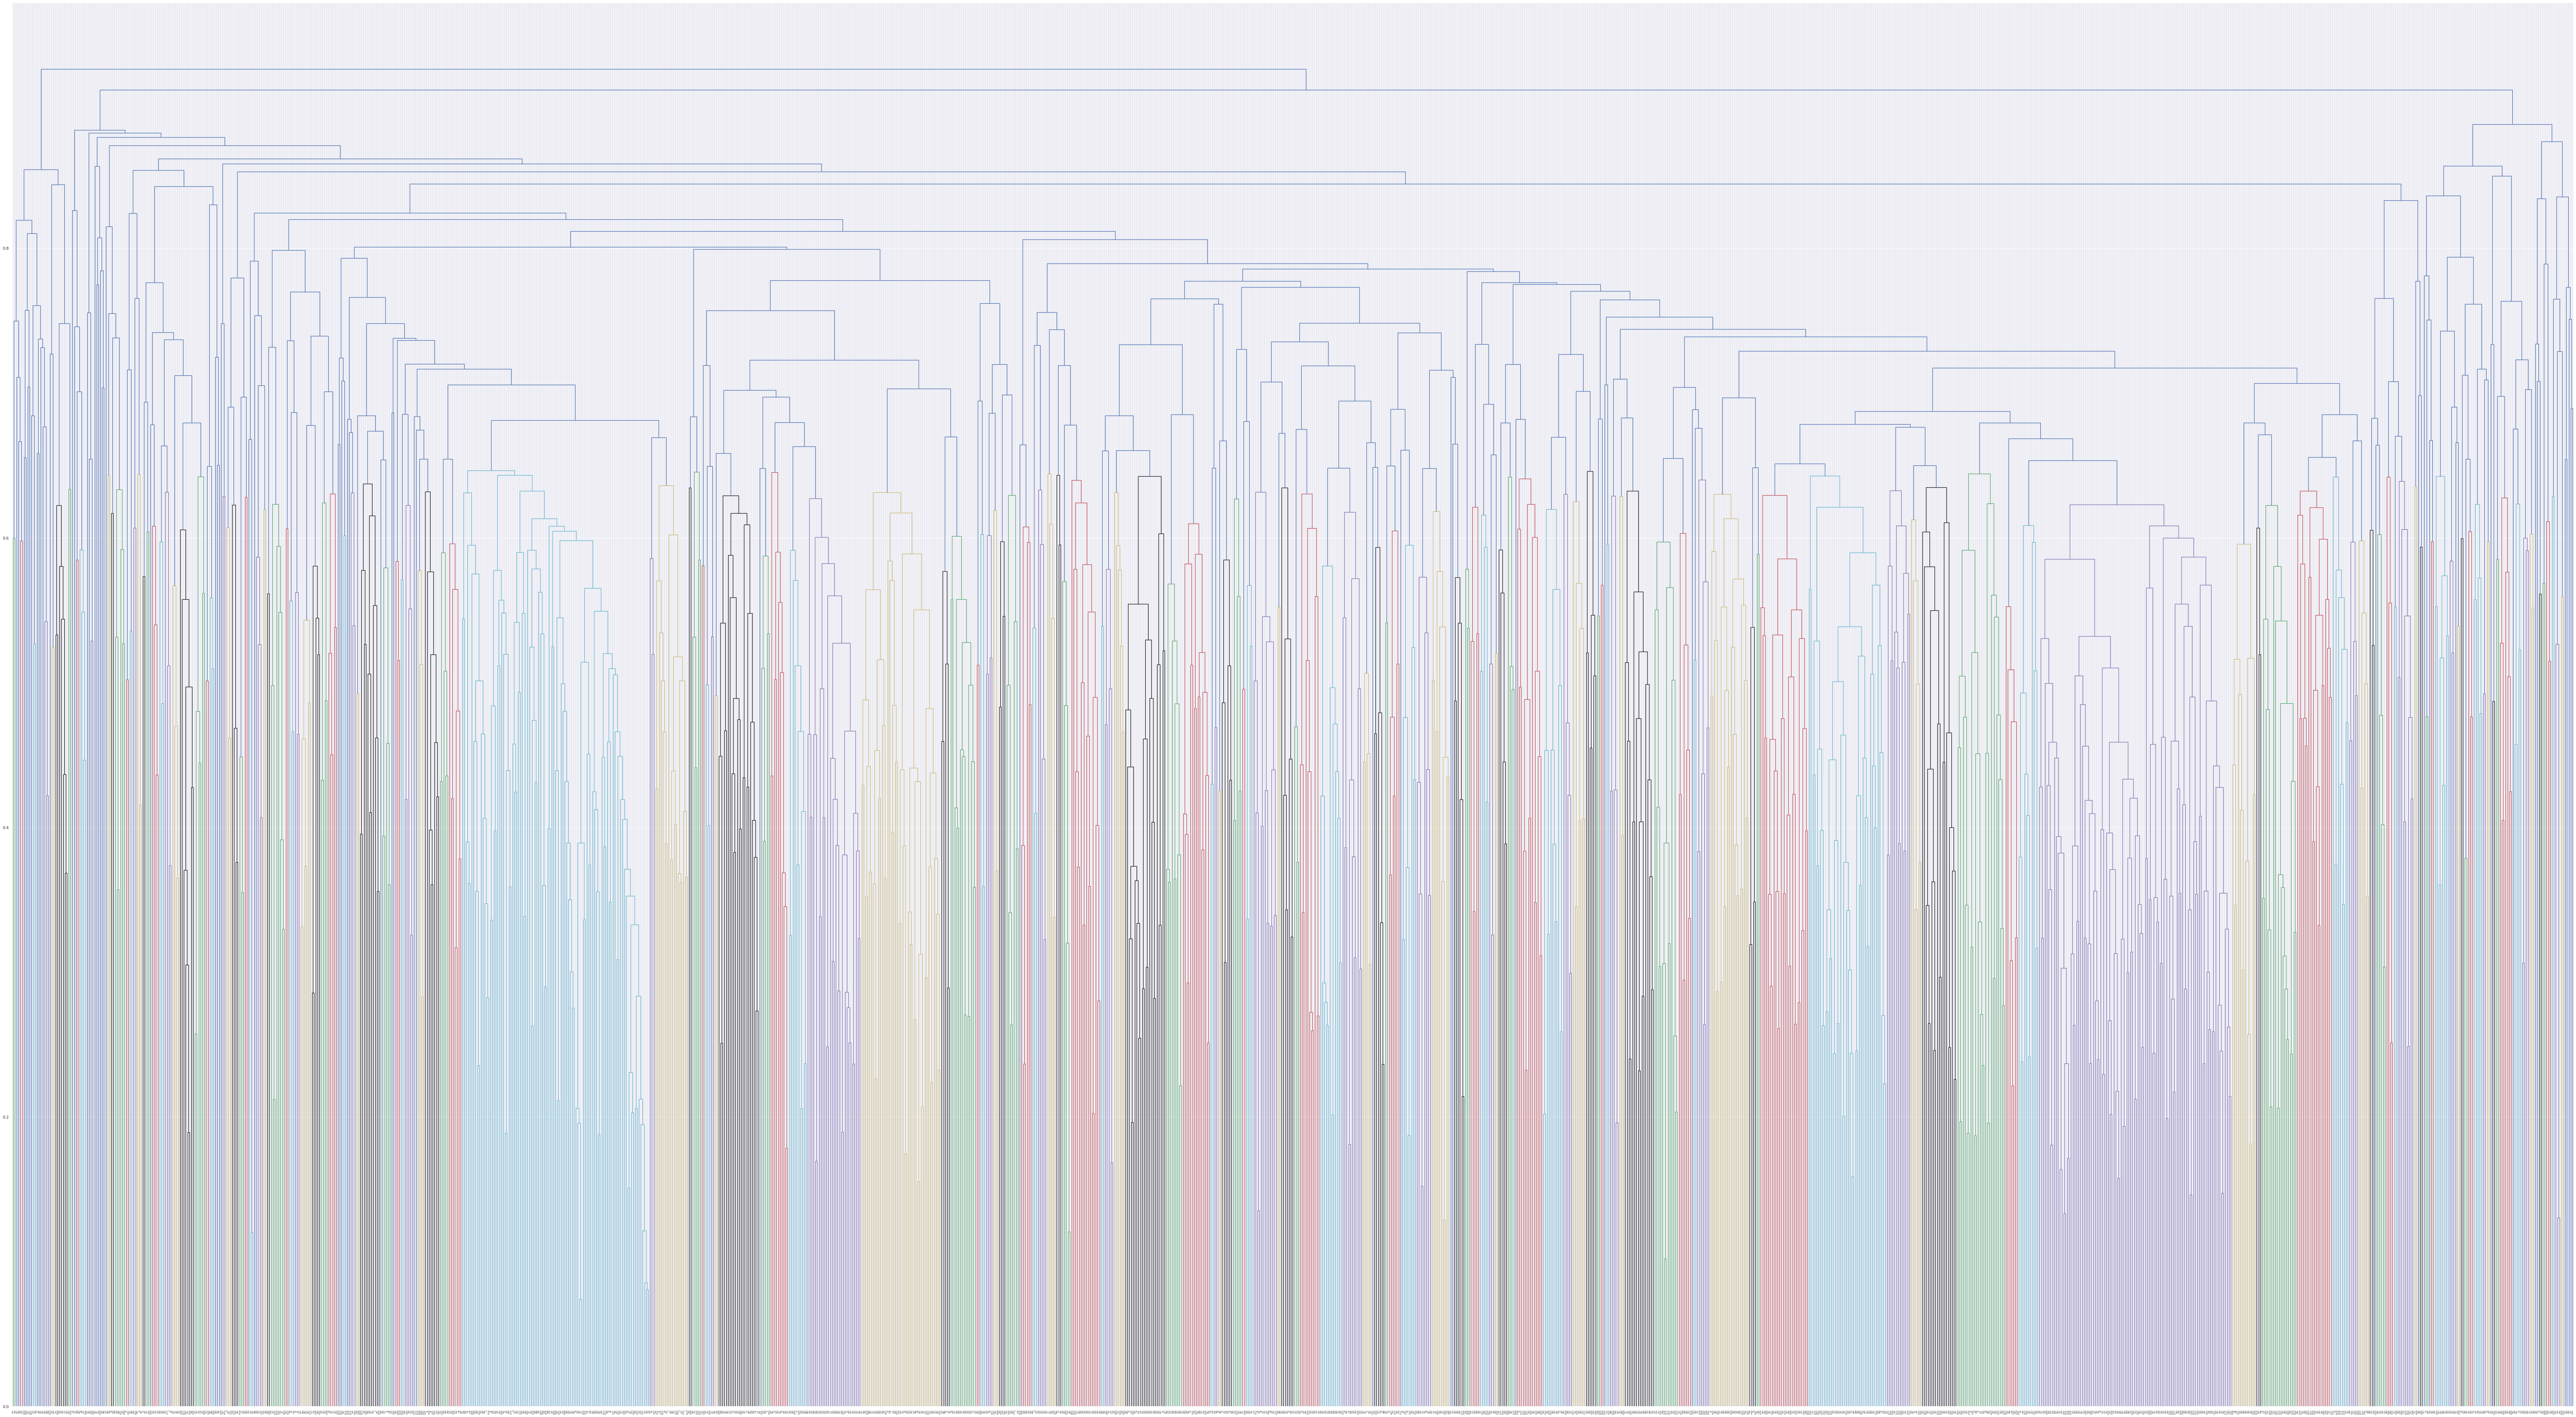

In [44]:
plt.figure(figsize=(128, 72))
dn = hierarchy.dendrogram(Z)
plt.show()
